# Определение перспективного тарифа для телеком-компании

## Изучение общей информации из файлов

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from IPython.display import display
from scipy import stats as st

In [2]:
files = [
    '/datasets/calls.csv',
    '/datasets/internet.csv',
    '/datasets/messages.csv',
    '/datasets/tariffs.csv',
    '/datasets/users.csv',
]

In [3]:
for f in files:
    print('\nПуть к файлу:', f)
    display(pd.read_csv(f, index_col=0).head()) #прочитаем файлы из списка
    print(pd.read_csv(f, index_col=0).info())
    print('\nКоличество пропусков в колонках', f, ':')
    print(pd.read_csv(f, index_col=0).isna().sum()) #проверка на пропуски
    print('\nКоличество дубликатов в колонках', f, ':')
    print(pd.read_csv(f, index_col=0).duplicated().sum()) #проверка на дубликаты
    print('***' * 15)


Путь к файлу: /datasets/calls.csv


,call_date,duration,user_id
id,,,
1000_0,2018-07-25,0.00,1000
1000_1,2018-08-17,0.00,1000
1000_2,2018-06-11,2.85,1000
1000_3,2018-09-21,13.80,1000
1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
Index: 202607 entries, 1000_0 to 1499_219
Data columns (total 3 columns):
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.2+ MB
None

Количество пропусков в колонках /datasets/calls.csv :
call_date    0
duration     0
user_id      0
dtype: int64

Количество дубликатов в колонках /datasets/calls.csv :
8838
*********************************************

Путь к файлу: /datasets/internet.csv


,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB
None

Количество пропусков в колонках /datasets/internet.csv :
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

Количество дубликатов в колонках /datasets/internet.csv :
0
*********************************************

Путь к файлу: /datasets/messages.csv


,message_date,user_id
id,,
1000_0,2018-06-27,1000
1000_1,2018-10-08,1000
1000_2,2018-08-04,1000
1000_3,2018-06-16,1000
1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
Index: 123036 entries, 1000_0 to 1499_183
Data columns (total 2 columns):
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.8+ MB
None

Количество пропусков в колонках /datasets/messages.csv :
message_date    0
user_id         0
dtype: int64

Количество дубликатов в колонках /datasets/messages.csv :
70379
*********************************************

Путь к файлу: /datasets/tariffs.csv


,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
messages_included,,,,,,,
50,15360,500,550,200,3,3,smart
1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 50 to 1000
Data columns (total 7 columns):
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(6), object(1)
memory usage: 128.0+ bytes
None

Количество пропусков в колонках /datasets/tariffs.csv :
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64

Количество дубликатов в колонках /datasets/tariffs.csv :
0
*********************************************

Путь к файлу: /datasets/users.csv


,age,churn_date,city,first_name,last_name,reg_date,tariff
user_id,,,,,,,
1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1000 to 1499
Data columns (total 7 columns):
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(1), object(6)
memory usage: 31.2+ KB
None

Количество пропусков в колонках /datasets/users.csv :
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

Количество дубликатов в колонках /datasets/users.csv :
0
*********************************************


ДЛИТЕЛЬНОСТЬ ЗВОНКОВ


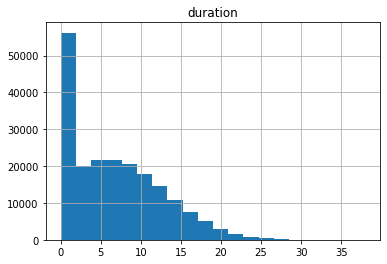

In [4]:
pd.read_csv('/datasets/calls.csv').hist('duration', bins=20)
print('ДЛИТЕЛЬНОСТЬ ЗВОНКОВ')

ИСПОЛЬЗОВАННЫЕ МЕГАБАЙТЫ


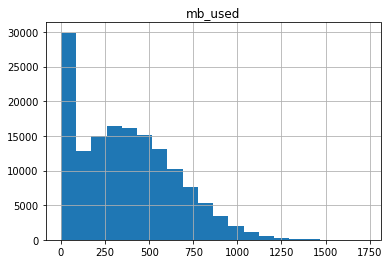

In [5]:
pd.read_csv('/datasets/internet.csv').hist('mb_used', bins=20)
print('ИСПОЛЬЗОВАННЫЕ МЕГАБАЙТЫ')

СМС-СООБЩЕНИЯ


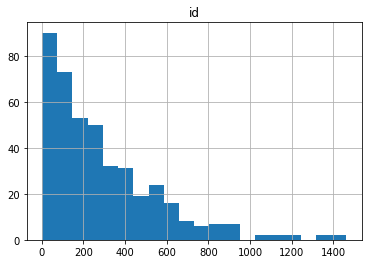

In [6]:
pd.read_csv('/datasets/messages.csv').pivot_table(index='user_id', values='id', aggfunc='count').hist(bins=20, label='msg')
print('СМС-СООБЩЕНИЯ')

ВОЗРАСТ ПОЛЬЗОВАТЕЛЕЙ


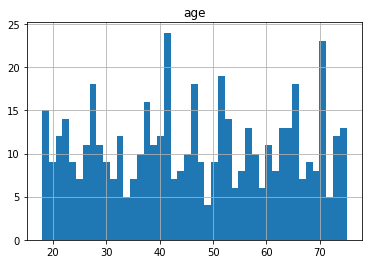

In [7]:
pd.read_csv('/datasets/users.csv').hist('age', bins=45)
print('ВОЗРАСТ ПОЛЬЗОВАТЕЛЕЙ')

РАСПРЕДЕЛЕНИЕ ПОЛЬЗОВАТЕЛЕЙ ПО ГОРОДАМ


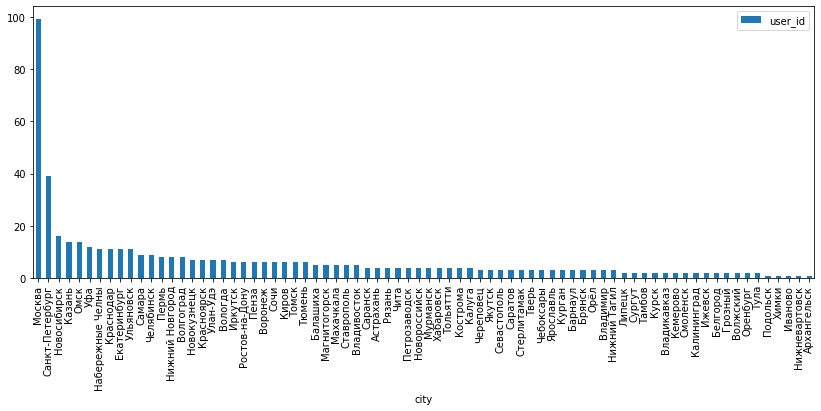

In [8]:
pd.read_csv('/datasets/users.csv').pivot_table(
    index='city', values='user_id', aggfunc='count'
).sort_values(by='user_id', ascending=False).plot(kind='bar', figsize=(14, 5))
print('РАСПРЕДЕЛЕНИЕ ПОЛЬЗОВАТЕЛЕЙ ПО ГОРОДАМ')

### Вывод

При первом взгляде на таблицы видно, что во всех столбцах, касающихся даты, должен быть формат datetime, а не object.

Дубликатов и пропущенных значений нет ни в одной таблице, кроме users.csv. В users.csv 462 пропуска, которые по условию задачи обозначают, что тариф пользователя не действует. Их можно не обрабатывать, так как на результат они не влияют.

Гистограммы длительности звонков и объема интернет-трафика в Мб выявляют необычные пики у нуля. Гистограмма возрастов пользователей не похожа по форме на нормальное распределение, возможно, выборка пользователей для этого слишком мала. Гистограмма для смс-сообщений несимметрична.

Больше всего пользователей из Москвы, на втором месте - Санкт-Петербург, где пользователей более чем в два раза меньше. Количество пользователей в каждом из других городов не достигает половины от количества пользователей Санкт-Петербурга.

## Подготовка данных

Считаем файлы в переменные, при этом сменим формат для даты на datetime и создадим колонки с месяцами.

In [9]:
df_calls = pd.read_csv('/datasets/calls.csv')
df_calls['call_date'] = pd.to_datetime(
    df_calls['call_date'], format='%Y-%m-%d' #преобразуем формат в datetime
)
df_calls['month'] = df_calls['call_date'].astype('datetime64[M]')  #номер месяца

In [10]:
pd.DatetimeIndex(df_calls['call_date']).year.unique() #проверяем уникальные значения для года

Int64Index([2018], dtype='int64', name='call_date')

In [11]:
df_inter = pd.read_csv('/datasets/internet.csv')
df_inter['session_date'] = pd.to_datetime(
    df_inter['session_date'], format='%Y-%m-%d' #преобразуем формат в datetime
)
df_inter['month'] = df_inter['session_date'].astype('datetime64[M]') #номер месяца

In [12]:
pd.DatetimeIndex(df_inter['session_date']).year.unique() #проверяем уникальные значения для года

Int64Index([2018], dtype='int64', name='session_date')

In [13]:
df_msg = pd.read_csv('/datasets/messages.csv')
df_msg['message_date'] = pd.to_datetime(
    df_msg['message_date'], format='%Y-%m-%d' #преобразуем формат в datetime
)
df_msg['month'] = df_msg['message_date'].astype('datetime64[M]') #номер месяца

In [14]:
pd.DatetimeIndex(df_msg['message_date']).year.unique() #проверяем уникальные значения для года

Int64Index([2018], dtype='int64', name='message_date')

Годов, кроме 2018, не обнаружено.

In [15]:
df_users = pd.read_csv('/datasets/users.csv')

In [16]:
df_tariffs = pd.read_csv('/datasets/tariffs.csv')

Проверим данные на подозрительные значения с помощью графиков.

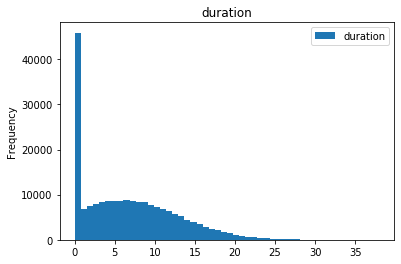

In [17]:
df_calls.plot(y='duration', title='duration', kind='hist', bins=50)

Очень высокий пик "нулевых" звонков - это пропущенные звонки.

In [18]:
len(df_calls.query('duration == 0')) #количество нулевых значений в df_calls

39613

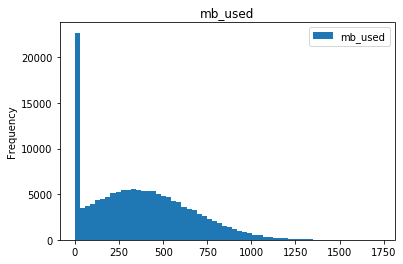

In [19]:
df_inter.plot(y='mb_used', title='mb_used', kind='hist', bins=60)

Аналогичная ситуация с интернетом - видимо, часто были случаи, когда загружались килобайты информации, но на мегабайты их не набиралось.

In [20]:
len(df_inter.query('mb_used == 0')) #проверим, много случаев, где не потратили ни одного мегабайта

19598

In [21]:
len(df_inter.query('mb_used.isna()')) #есть ли пропущенные значения?

0

Пропущенных значений для интернета нет, но есть масса нулевых. Очевидно, что случаи с нулевыми значениями - это дни, когда интернетом не пользовались.

Мы можем убить двух зайцев сразу: и устранить нулевые значения, и сделать работу с таблицами удобнее. Для этого объединим таблицы с информацией об услугах в единый датафрейм: так как тарифы с помесячной платой, найдем данные по объемам услуг для каждого из пользователей по месяцам с помощью pivot_table. 

За "сделанный" звонок будем считать такой звонок, который длился более 0 секунд, то есть отвеченный звонок - во-первых, только за такой звонок взимается плата, поэтому отвеченные звонки интересуют оператора больше, во-вторых, это не будет искажать показатели средней длительности звонка, если такую метрику потребуется рассчитать в будущем.

Затем таблицы данных о звонках, сообщениях и использовании интернета объединим по user_id и month.  Используем метод объединения outer, чтобы информация не потерялась.

In [22]:
df_calls = df_calls.query('duration != 0').pivot_table( #чтобы учесть в количестве звонков только ненулевые, делаем срез
    index=['user_id', 'month'], values='duration', aggfunc=['sum', 'count']
)
df_inter = df_inter.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum')
df_msg = df_msg.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count') #считаем количество смс с помощью count
df_calls.columns = ['calls_duration', 'calls_number'] #переименуем колонки для удобства работы с общим датафреймом в будущем
df_msg.columns = ['messages'] #переименуем колонку для удобства работы с общим датафреймом в будущем

In [23]:
df_services = df_calls.merge(df_inter, on=['user_id', 'month'], how='outer')
df_services = df_services.merge(df_msg, on=['user_id', 'month'], how='outer')

Необходимо округлить calls_duration до целочисленных значений вверх во всех случаях (так как даже 1 секунда округляется оператором до минуты).

In [24]:
df_services['calls_duration'] = np.ceil(df_services['calls_duration'])

Значения mb_used переведем в гигабайты для удобства - тариф учитывает только гигабайты.

In [25]:
df_services['gb'] = df_services['mb_used'] / 1024 #в 1 гигабайте 1024 мегабайт
df_services['gb'] = np.ceil(df_services['gb']) #округляем до целого в большую сторону согласно условиям оператора

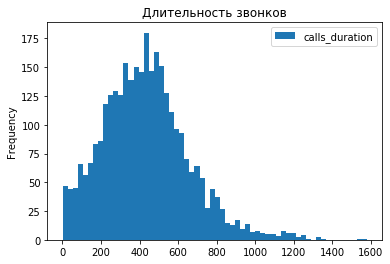

In [26]:
df_services.plot(y='calls_duration', title='Длительность звонков', kind='hist', bins=60)

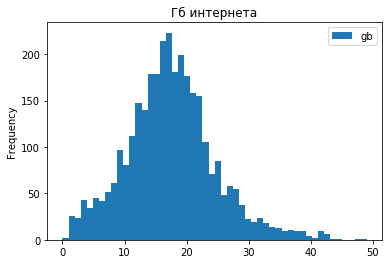

In [27]:
df_services.plot(y='gb', title='Гб интернета', kind='hist', bins=50)

Аномалия с пиками у нуля устранена.

In [28]:
df_services.isna().mean() #определим долю пропусков

calls_duration    0.014312
calls_number      0.014312
mb_used           0.003423
messages          0.154636
gb                0.003423
dtype: float64

Так как для объединения был использован способ out, во всех столбцах появились пропущенные значения.

Удалять пропущенные значения не будем - они несут в себе информацию о том, что конкретными услугами не пользовались.

Из доли пропусков можно сделать выводы: чаще всего не пользуются смс, реже всего не пользуются интернетом.

Проверим информацию о пользователях на наличие дубликатов, необычных значений.

In [29]:
df_users.duplicated().sum() #количество дубликатов

0

In [30]:
df_users['city'].unique() #нет ли опечаток в названии городов

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

In [31]:
df_users['tariff'].unique()

array(['ultra', 'smart'], dtype=object)

Сменим тип значений даты в таблице df_users на datetime.

In [32]:
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')

Добавим данные помесячной выручки с каждого пользователя. Для удобства объединим датафрейм с таблицей, описывающей тарифы.

In [33]:
df_services = df_services.reset_index() #разделим мультииндекс на столбцы, чтобы облегчить объединение данных из таблиц

In [34]:
#добавим в таблицу название тарифа и город, которые будут необходимы для проверки гипотез
df_services = df_services.merge(df_users[['user_id', 'tariff', 'city']], on='user_id', how='inner')

In [35]:
df_services = df_services.merge(df_tariffs, left_on='tariff', right_on='tariff_name')

In [36]:
df_services.head(5)

,user_id,month,calls_duration,calls_number,mb_used,messages,gb,tariff,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,2018-05-01,151.0,17.0,2253.49,22.0,3.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,ultra
1,1000,2018-06-01,159.0,28.0,23233.77,60.0,23.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,ultra
2,1000,2018-07-01,319.0,41.0,14003.64,75.0,14.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,ultra
3,1000,2018-08-01,390.0,42.0,14055.93,81.0,14.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,ultra
4,1000,2018-09-01,441.0,46.0,14568.91,57.0,15.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,ultra


Расчеты:

In [37]:
def negative_to_zero(number): #функция, преоразующая отрицательные значения в ноль
    if number < 0:
        return 0
    return number

In [38]:
#вычитаем бесплатный лимит из объема фактических услуг
df_services['income'] = (
    df_services['calls_duration'] - df_services['minutes_included'] #пользователю доплачивать за неиспользованный пакет не будут
).apply(negative_to_zero) * df_services['rub_per_minute'] #поэтому отрицательную разность превращаем в ноль
#остаток умножаем на значение из тарифного плана
df_services['income'] = df_services['income'].fillna(0) #заполняем пропуски выручки нулями, чтобы избежать ошибок расчета

In [39]:
df_services['income'] += (
df_services['messages'] - df_services['messages_included']
).apply(negative_to_zero) * df_services['rub_per_message']
df_services['income'] = df_services['income'].fillna(0)

In [40]:
df_services['income'] += (
df_services['gb'] - (df_services['mb_per_month_included'] / 1024)
).apply(negative_to_zero) * df_services['rub_per_gb']
df_services['income'] = df_services['income'].fillna(0)

In [41]:
df_services['income'] += df_services['rub_monthly_fee'] #прибавляем абонентскую плату, соответствующую тарифному плану

In [42]:
df_services['income'].describe() #минимальное значение соответствует тарифному плану smart

count    3214.000000
mean     1497.439017
std       790.553209
min       550.000000
25%       715.750000
50%      1552.500000
75%      1950.000000
max      6614.000000
Name: income, dtype: float64

In [43]:
df_services['income'].isna().sum() #пропусков нет - для каждого пользователя есть значение помесячной выручки

0

### Вывод

В процессе подготовки данных выявлены аномальные пики у нуля для продолжительности звонков и интернет-трафика. Нули для звонков - пропущенные вызовы, нули для интернет-трафика - видимо, трафик не достиг величины мегабайта.

Аномальные пики были устранены в ходе группировки данных по месяцам у каждого уникального пользователя, так как столбцы были просуммированы (ноль вклада в сумму не дает). По месяцам распределить данные позволил перевод даты в тип datetime.

При анализе оставшихся пропусков был сделан вывод, что чаще интернет - самая популярная услуга, а смс пользуются реже, чем интернетом и звонками.

Агрегация данных в единый датафрейм позволила вычислить помесяную выручку каждого пользователя. Минимальная выручка составляет 550 руб. - стоимость пакета тарифа "Смарт". Максимальная выручка - 6614 руб. Среднее значение выручки и медиана близки к 1500 руб. - это выше стоимости пакета тарифа "Смарт", но ниже стоимости пакета тарифа "Ультра". 

## Анализ данных

Запишем в переменную более компактную таблицу с необходимыми данными:

In [44]:
monthly_user_info = df_services[[
    'user_id', 
    'month', 
    'calls_number', 
    'calls_duration', 
    'messages', 
    'gb', 
    'mb_used',
    'income', 
    'tariff',
    'city'
]]

In [45]:
monthly_user_info.head()

,user_id,month,calls_number,calls_duration,messages,gb,mb_used,income,tariff,city
0,1000,2018-05-01,17.0,151.0,22.0,3.0,2253.49,1950.0,ultra,Краснодар
1,1000,2018-06-01,28.0,159.0,60.0,23.0,23233.77,1950.0,ultra,Краснодар
2,1000,2018-07-01,41.0,319.0,75.0,14.0,14003.64,1950.0,ultra,Краснодар
3,1000,2018-08-01,42.0,390.0,81.0,14.0,14055.93,1950.0,ultra,Краснодар
4,1000,2018-09-01,46.0,441.0,57.0,15.0,14568.91,1950.0,ultra,Краснодар


Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?

Составим сводную таблицу.

In [46]:
monthly_user_info.pivot_table(index='tariff', values=['calls_duration', 'messages', 'gb'], aggfunc=['mean', 'var', 'std'])

mean                                  var             \
       calls_duration         gb   messages calls_duration         gb   
tariff                                                                  
smart      396.344890  16.336176  38.716441   31945.580998  32.923756   
ultra      517.512144  19.694359  61.161006   83228.224747  94.146734   

                               std                       
           messages calls_duration        gb   messages  
tariff                                                   
smart    717.594201     178.733268  5.737923  26.787949  
ultra   2109.659183     288.493024  9.702924  45.931026

Отдельно посчитаем среднее, дисперсию и стандартное отклонение для значений, чтобы записать их переменные.

In [47]:
smart_call_mean = monthly_user_info.loc[monthly_user_info['tariff'] == 'smart', 'calls_duration'].mean() #среднее
#мы исследуем выборку, поэтому присваиваем ddof единицу
smart_call_var = np.var(monthly_user_info.loc[monthly_user_info['tariff'] == 'smart', 'calls_duration'], ddof=1) #дисперсия
smart_call_std = np.std(monthly_user_info.loc[monthly_user_info['tariff'] == 'smart', 'calls_duration'], ddof=1) #стандартное отклонение

In [48]:
print('Средняя продолжительность звонка, smart: {:.3f}'.format(smart_call_mean))
print('Дисперсия для продолжительности звонка, smart: {:.3f}'.format(smart_call_var))
print('Стандартное отклонение для продолжительности звонка, smart: {:.3f}'.format(smart_call_std))

Средняя продолжительность звонка, smart: 396.345
Дисперсия для продолжительности звонка, smart: 31945.581
Стандартное отклонение для продолжительности звонка, smart: 178.733


In [49]:
ultra_call_mean = monthly_user_info.loc[monthly_user_info['tariff'] == 'ultra', 'calls_duration'].mean() #среднее
ultra_call_var = np.var(monthly_user_info.loc[monthly_user_info['tariff'] == 'ultra', 'calls_duration'], ddof=1) #дисперсия
ultra_call_std = np.std(monthly_user_info.loc[monthly_user_info['tariff'] == 'ultra', 'calls_duration'], ddof=1) #стандартное отклонение

In [50]:
print('Средняя продолжительность звонка, ultra: {:.3f}'.format(ultra_call_mean))
print('Дисперсия для продолжительности звонка, ultra: {:.3f}'.format(ultra_call_var))
print('Стандартное отклонение для продолжительности звонка, ultra: {:.3f}'.format(ultra_call_std))

Средняя продолжительность звонка, ultra: 517.512
Дисперсия для продолжительности звонка, ultra: 83228.225
Стандартное отклонение для продолжительности звонка, ultra: 288.493


In [51]:
smart_msg_mean = monthly_user_info.loc[monthly_user_info['tariff'] == 'smart', 'messages'].mean() #среднее
#мы исследуем выборку, поэтому присваиваем ddof единицу
smart_msg_var = np.var(monthly_user_info.loc[monthly_user_info['tariff'] == 'smart', 'messages'], ddof=1) #дисперсия
smart_msg_std = np.std(monthly_user_info.loc[monthly_user_info['tariff'] == 'smart', 'messages'], ddof=1) #стандартное отклонение

In [52]:
print('Среднее количество смс, smart: {:.3f}'.format(smart_msg_mean))
print('Дисперсия для количества смс, smart: {:.3f}'.format(smart_msg_var))
print('Стандартное отклонение для количества смс, smart: {:.3f}'.format(smart_msg_std))

Среднее количество смс, smart: 38.716
Дисперсия для количества смс, smart: 717.594
Стандартное отклонение для количества смс, smart: 26.788


In [53]:
ultra_msg_mean = monthly_user_info.loc[monthly_user_info['tariff'] == 'ultra', 'messages'].mean() #среднее
#мы исследуем выборку, поэтому присваиваем ddof единицу
ultra_msg_var = np.var(monthly_user_info.loc[monthly_user_info['tariff'] == 'ultra', 'messages'], ddof=1) #дисперсия
ultra_msg_std = np.std(monthly_user_info.loc[monthly_user_info['tariff'] == 'ultra', 'messages'], ddof=1) #стандартное отклонение

In [54]:
print('Среднее количество смс, ultra: {:.3f}'.format(ultra_msg_mean))
print('Дисперсия для количества смс, ultra: {:.3f}'.format(ultra_msg_var))
print('Стандартное отклонение для количества смс, ultra: {:.3f}'.format(ultra_msg_std))

Среднее количество смс, ultra: 61.161
Дисперсия для количества смс, ultra: 2109.659
Стандартное отклонение для количества смс, ultra: 45.931


In [55]:
smart_gb_mean = monthly_user_info.loc[monthly_user_info['tariff'] == 'smart', 'gb'].mean() #среднее
#мы исследуем выборку, поэтому присваиваем ddof единицу
smart_gb_var = np.var(monthly_user_info.loc[monthly_user_info['tariff'] == 'smart', 'gb'], ddof=1) #дисперсия
smart_gb_std = np.std(monthly_user_info.loc[monthly_user_info['tariff'] == 'smart', 'gb'], ddof=1) #стандартное отклонение

In [56]:
print('Среднее количество потраченных Гб, smart: {:.3f}'.format(smart_gb_mean))
print('Дисперсия для потраченных Гб, smart: {:.3f}'.format(smart_gb_var))
print('Стандартное отклонение для потраченных Гб, smart: {:.3f}'.format(smart_gb_std))

Среднее количество потраченных Гб, smart: 16.336
Дисперсия для потраченных Гб, smart: 32.924
Стандартное отклонение для потраченных Гб, smart: 5.738


In [57]:
ultra_gb_mean = monthly_user_info.loc[monthly_user_info['tariff'] == 'ultra', 'gb'].mean() #среднее
#мы исследуем выборку, поэтому присваиваем ddof единицу
ultra_gb_var = np.var(monthly_user_info.loc[monthly_user_info['tariff'] == 'ultra', 'gb'], ddof=1) #дисперсия
ultra_gb_std = np.std(monthly_user_info.loc[monthly_user_info['tariff'] == 'ultra', 'gb'], ddof=1) #стандартное отклонение

In [58]:
print('Среднее количество потраченных Гб, ultra: {:.3f}'.format(ultra_gb_mean))
print('Дисперсия для потраченных Гб, ultra: {:.3f}'.format(ultra_gb_var))
print('Стандартное отклонение для потраченных Гб, ultra: {:.3f}'.format(ultra_gb_std))

Среднее количество потраченных Гб, ultra: 19.694
Дисперсия для потраченных Гб, ultra: 94.147
Стандартное отклонение для потраченных Гб, ultra: 9.703


Можем свести данные в маленькие таблицы для наглядности:

In [59]:
two_tariffs_call = pd.DataFrame(data={
    'smart': [smart_call_mean, smart_call_var, smart_call_std], 'ultra': [ultra_call_mean, ultra_call_var, ultra_call_std]
}, index=['mean', 'var', 'std'])

In [60]:
print('ЗВОНКИ')
two_tariffs_call

ЗВОНКИ


,smart,ultra
mean,396.344890,517.512144
var,31945.580998,83228.224747
std,178.733268,288.493024


In [61]:
two_tariffs_msg = pd.DataFrame(data={
    'smart': [smart_msg_mean, smart_msg_var, smart_msg_std], 'ultra': [ultra_msg_mean, ultra_msg_var, ultra_msg_std]
}, index=['mean', 'var', 'std'])

In [62]:
print('СМС')
two_tariffs_msg

СМС


,smart,ultra
mean,38.716441,61.161006
var,717.594201,2109.659183
std,26.787949,45.931026


In [63]:
two_tariffs_gb = pd.DataFrame(data={
    'smart': [smart_gb_mean, smart_gb_var, smart_gb_std], 'ultra': [ultra_gb_mean, ultra_gb_var, ultra_gb_std]
}, index=['mean', 'var', 'std'])

In [64]:
print('ИНТЕРНЕТ')
two_tariffs_gb

ИНТЕРНЕТ


,smart,ultra
mean,16.336176,19.694359
var,32.923756,94.146734
std,5.737923,9.702924


Построим гистограммы, дополнительно нормализовав значения по правилу трех сигм, чтобы избавиться от выбросов и графики было легче оценивать.

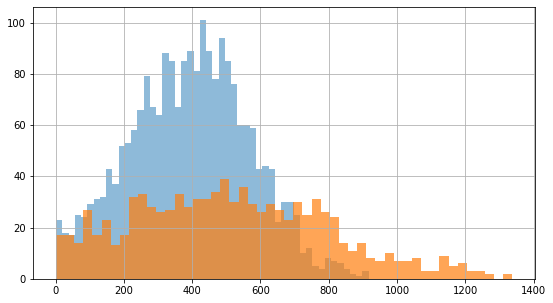

In [65]:
monthly_user_info.query(
    '(tariff == "smart") and ((@smart_call_mean - 3*@smart_call_std) <= calls_duration <= (@smart_call_mean + 3*@smart_call_std))'
)['calls_duration'].hist(bins=50, alpha=0.5, figsize=(9, 5))
monthly_user_info.query(
    '(tariff == "ultra") and ((@ultra_call_mean - 3*@ultra_call_std) <= calls_duration <= (@ultra_call_mean + 3*@ultra_call_std))'
)['calls_duration'].hist(bins=50, alpha=0.7)

Гистограммы похожи на нормальное распределение. Есть обрывы гистограмм слева - нет значений меньше нуля.

На гистограмме видно, что ultra в среднем имеет большее высокие значения для продолжительности звонков, чем smart.

Гистограмма тарифа ultra имеет большой разброс значений.

Пользователи тарифа ultra могут позволить себе говорить по телефону дольше - там, где уже не встречаются значения smart, есть значения для ultra. Лимит по минутам для ultra - 3000, но пользователи ultra не добираются и до половины лимита. Напротив, пользователи smart часто превышают свой лимит в 500 минут.

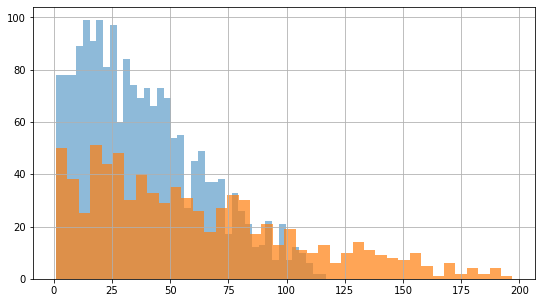

In [66]:
monthly_user_info.query(
    '(tariff == "smart") and ((@smart_msg_mean - 3*@smart_msg_std) <= messages <= (@smart_msg_mean + 3*@smart_msg_std))'
)['messages'].hist(bins=40, alpha=0.5, figsize=(9, 5))
monthly_user_info.query(
    '(tariff == "ultra") and ((@ultra_msg_mean - 3*@ultra_msg_std) <= messages <= (@ultra_msg_mean + 3*@ultra_msg_std))'
)['messages'].hist(bins=40, alpha=0.7)

Гистограммы больше напоминают распределение Пуассона, чем нормальное, имеют положительную скошенность. У них обеих обрывы слева, так как значений меньше нуля нет.

Самые частые значения находятся в начале горизонтальной оси - пользователи предпочитают укладываться в лимит смс. В тарифе ultra лимит - 1000 сообщений, однако пользователи ultra в целом не добираются даже до 1/5 своего лимита. В то же время, пользователи smart часто превышают свой лимит в 50 смс.

Тариф ultra имеет большой разброс значений относительно тарифа smart.

Значения количества смс в месяц свыше 125 встречаются только у пользователей тарифа ultra.

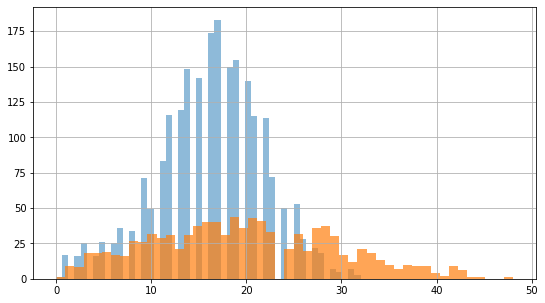

In [67]:
monthly_user_info.query(
    '(tariff == "smart") and ((@smart_gb_mean - 3*@smart_gb_std) <= gb <= (@smart_gb_mean + 3*@smart_gb_std))'
)['gb'].hist(bins=50, alpha=0.5, figsize=(9, 5))
monthly_user_info.query(
    '(tariff == "ultra") and ((@ultra_gb_mean - 3*@ultra_gb_std) <= gb <= (@ultra_gb_mean + 3*@ultra_gb_std))'
)['gb'].hist(bins=50, alpha=0.7)

Гистограммы по форме похожи на нормальное распределение.

Четко видно, что среднее значение smart меньше, чем среднее значение ultra, примерно на 3 Гб.

Тариф ultra снова имеет большой разброс значений по сравнению со значениями тарифа smart.

Пользователи тарифа ultra могут использовать более 35 Гб в месяц, в отличие от пользователей тарифа smart. Для пользователей smart наиболее частым объемом трафика является 12-22 Гб.

По гистограмме заметно, что пользователи обоих тарифов часто превышают свои лимиты на интернет-трафик, но чаще это делают пользователи smart. 

### Вывод

Среднее значение продолжительности разговора, смс-сообщений и интернет-трафика оказалось выше у пользователей тарифа "Ультра": 517 минут разговора в среднем против 396 минут, 61 смс против 39 смс, почти 20 Гб против 16 Гб. Это неудивительно, так как лимиты на тарифе "Ультра" гораздо выше, чем на тарифе "Смарт". Разброс значений тарифа "Ультра" шире, чем значений тарифа "Смарт", что можно объяснить большими лимитами.

Выяснилось, что пользователи тарифа "Смарт" чаще превышают лимиты и, соответственно, доплачивают за услуги сверх тарифного пакета.

Тенденция к превышению лимитов интернет-трафика была выявлена у пользователей обоих тарифов.

## Проверка гипотез

Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

***H₀: средняя выручка пользователей тарифов «Ультра» и «Смарт» равны.***

***H₁: средняя выручка пользователей тарифов «Ультра» и «Смарт» не равны.***

In [68]:
alpha = 0.05

In [69]:
smart_income = monthly_user_info.query('tariff == "smart"')['income']
ultra_income = monthly_user_info.query('tariff == "ultra"')['income']

In [70]:
print('Средняя выручка smart: {:.3f}'.format(smart_income.mean()))
print('Средняя выручка ultra: {:.3f}'.format(ultra_income.mean()))

Средняя выручка smart: 1244.356
Средняя выручка ultra: 2070.152


In [71]:
results = st.ttest_ind(smart_income, ultra_income) #гипотеза о равенстве средних двух независимых совокупностей

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.3037784176255047e-186
Отвергаем нулевую гипотезу


*Полученное значение p-value говорит о том, что такое же или большее различие в значениях выручки между тарифами получить случайно можно только с крайне малой вероятностью. Это слишком малая вероятность, чтобы делать вывод о незначимом различии между средними значениями выручки тарифов.*

**Нулевая гипотеза о равенстве средней выручки пользователей тарифов отвергнута.**

~~~

***H₀: средняя выручка пользователей из Москвы и других регионов равны.***

***H₁: средняя выручка пользователей из Москвы и других регионов не равны.***

In [72]:
moscow_income = monthly_user_info.query('city == "Москва"')['income']
others_income = monthly_user_info.query('city != "Москва"')['income']

In [73]:
print('Средняя выручка, Москва: {:.3f}'.format(moscow_income.mean()))
print('Средняя выручка, другие города: {:.3f}'.format(others_income.mean()))

Средняя выручка, Москва: 1509.334
Средняя выручка, другие города: 1494.647


In [74]:
results_city = st.ttest_ind(moscow_income, others_income) #гипотеза о равенстве средних двух независимых совокупностей

print('p-значение:', results_city.pvalue)

if (results_city.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.6794748476607528
Не получилось отвергнуть нулевую гипотезу


*Полученное значение p-value говорит о том, такое же или большее различие в значениях выручки между Москвой и другими городами можно получить случайно с вероятностью почти 70%. Это слишком большая вероятность, чтобы делать вывод о значимом различии между средними значениями выручки.*

**Нулевая гипотеза о равенстве средней выручки пользователей из Москвы и других регионов не может быть отвергнута.**

Нулевые гипотезы были сформулированы исходя из того, что нулевая гипотеза всегда должна содержать знак равенства.

Использован t-критерий Стьюдента, так как нам нужна оценка статистической значимости разности двух выборочных средних, а имеем мы не слишком большие выборки с большим разбросом значений.

### Вывод

Средняя выручка пользователей тарифа "Ультра" оказалась статистически значимо больше средней выручки пользователей тарифа "Смарт" - 2070 руб. против 1244 руб.

Статистически значимых различий между выручкой пользователей из Москвы и других регионов выявлено не было. Средняя выручка пользователей из Москвы и других городов приблизительно равна 1500 руб.

Использован подход гипотезы о равенстве средних двух генеральных совокупностей, метод ttest_ind из stats, так как мы проверяли две независимые выборки.

## Общий вывод

В ходе выполнения проекта были проанализированы данные о пользователях тарифов "Смарт" и "Ультра" оператора "Мегалайна".

В процессе подготовки данных выявлены и устранены с помощью группировки по месяцам и срезов данных аномальные пики у нуля для продолжительности звонков и интернет-трафика, которые по сути означали отсутствие факта "использования", а значит и последующей оплаты услуги. 

Еще на этапе подготовки данных на основании доли пропусков в столбцах длительности и количества звонков, количества смс-сообщений и объема интернет-трафика было выявлено, что интернет - самая популярная услуга, а смс пользуются реже, чем интернетом и звонками.

Минимальная выручка пользователя составляет 550 рублей (стоимость пакета тарифа "Смарт"), максимальная - 6614 рублей. Среднее значение выручки составляет примерно 1500 руб.

- Среднее значение продолжительности разговора у пользователей тарифа "Ультра" - 517 минут, у пользователей тарифа "Смарт" - 396 минут
- Среднее количество смс-сообщений у пользователей тарифа "Ультра" - 61 смс, у пользователей тарифа "Смарт" - 39 смс
- Средний объем интернет-трафика у пользователей тарифа "Ультра" - 20 Гб, у пользователей тарифа "Смарт" - 16 Гб
 
Это легко объяснить тем, что лимиты на тарифе "Ультра" гораздо выше, чем на тарифе "Смарт". Разброс значений тарифа "Ультра" шире, чем значений тарифа "Смарт", что также можно объяснить большими лимитами.

Кроме того, интересно, что пользователи тарифа "Смарт" чаще превышают лимиты своего тарифного пакета и, соответственно, чаще доплачивают за услуги сверх него.

Однако часто превышают лимиты интернет-трафика пользователи обоих тарифов. При этом, в отличие от пользователей тарифа "Смарт", пользователи тарифа "Ультра", судя по гистограммам, лимиты по количеству минут разговора и количеству смс не превышают или практически не превышают (выбросы при построении гистограмм были отсеяны с помощью правила трёх сигм).

Статистически значимых различий между выручкой пользователей из Москвы и других регионов выявлено не было, она приблизительно равна 1500 рублям.

Средняя выручка пользователей тарифа "Ультра" оказалась статистически значимо больше средней выручки пользователей тарифа "Смарт" - 2070 рублей против 1244 рублей.

Несмотря на то, что пользователи "Смарт" чаще переплачивают, больше выручки генерируют пользователи тарифа "Ультра".

Таким образом, для "Мегалайн" тариф "Ультра" лучше.

При составлении новых тарифных пакетов можно порекомендовать выделять бо́льшие лимиты на интернет, а на звонки и смс лимиты 1000 минут и 125 сообщений соответственно. Возможно, такой тариф привлечет больше клиентов, так как большое количество пользователей используют свыше 30 Гб в месяц в среднем, и практически все пользователи при этом укладываются в 1000 минут и 125 смс в месяц в среднем. Пользователям не будет казаться, что они "переплачивают" за неиспользованные минуты и смс. Цену при этом на тарифный пакет возможно установить на уровне или выше тарифа "Ультра".